In [1]:
# imports needed
import gensim 
import pandas as pd
import numpy as np
import random
import unidecode
import re
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize.regexp import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
from  nltk.stem.snowball import FrenchStemmer, EnglishStemmer
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from help_dicrah_functions import *


import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Loading and cleaning tweets

#### 1 load and clean tweets for w2v

In [2]:
filename='/Users/Michi/Google Drive/formation_data_science/twitter_project/help_dicrah/machine_learning/tweets_dilcrah_60k.csv'
#Streams/stream_#Web2day OR #aidessociales.jsonl'
#Users/help_dicrah_large_random_sample.jsonl'

def read_json_files(path_to_file):
    with open(path_to_file) as p:
        data = pd.read_json(p, lines=True)
    return data

#df = read_json_files(filename)
df = pd.read_csv(filename, header=None,
                 names=['tweet'], index_col=None)#.drop_duplicates(subset='id')

df.head()

,tweet
997565477458243584,@AngeFreddy Pouloulouuuu
957325640465862656,@R0eil Nan😂
1006280333573181441,@Coldmindxd LAQUELLE.
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔"
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...


In [3]:
#print(df.tweet[np.random.randint(0,df.shape[0])])
#df = df[['id','full_text']].drop_duplicates(subset='id')
df.head()
print(df.tweet[58])
df.shape

,tweet
997565477458243584,@AngeFreddy Pouloulouuuu
957325640465862656,@R0eil Nan😂
1006280333573181441,@Coldmindxd LAQUELLE.
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔"
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...


@americanflagusa @Philome17321717 Grace au grand Mufti fossoyeur de la Françe https://t.co/vZbOcJ1zwo


(47199, 1)

In [4]:
text=df.tweet[np.random.randint(1,df.shape[0])]
print(text)
tweet_cleaner(text, my_dict)

@MerlinFourier L'année prochaine également


u'l annee prochaine egalement'

In [5]:
#clean_tweets = [tweet_cleaner(str(tweet), my_dict) for tweet in list(df['full_text'])]

df['clean_tweets'] = df.tweet.apply(lambda x:' '.join(remove_stopwords(tokenize(tweet_cleaner(x, my_dict)), generate_stopwords())))

#df['clean_tweets'] = clean_tweets
df.shape
df.head(5)

(47199, 2)

,tweet,clean_tweets
997565477458243584,@AngeFreddy Pouloulouuuu,pouloulouuuu
957325640465862656,@R0eil Nan😂,nan
1006280333573181441,@Coldmindxd LAQUELLE.,laquelle
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔",dis ans ans
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...,mieux ils puissent faire


In [6]:
df = df.drop_duplicates(subset='clean_tweets')
df.shape

(37272, 2)

In [7]:
df['nc'] = [len(t) for t in df.clean_tweets]
df = df.drop(df[df.nc <= 2].index).drop('nc', axis=1)
df.shape

(37205, 2)

#### 2 load and clean tweets for ML

In [38]:
#tw_data_train = pd.read_csv('tw_data_train.csv')
#tw_data_test = pd.read_csv('tw_data_test.csv')
#print(tw_data_train.shape)
#print(tw_data_test.shape)
#ind_train_last = tw_data_train.shape[0]-1

tw_data = pd.read_csv('tw_data_labeled.csv')
#tw_data = pd.concat([tw_data_train, tw_data_test])

tw_data['Texte_clean'] = tw_data.Texte.apply(lambda x:' '.join(remove_stopwords(tokenize(tweet_cleaner(x, my_dict)), generate_stopwords())))
tw_data.loc[tw_data.Label=='SH', 'Label']='S'
tw_data.loc[tw_data.Label=='S', 'Label']='H'
print(tw_data.shape)



(1216, 4)


In [39]:
tw_data.Label.value_counts()
tw_data.head(5)

N    915
H    301
Name: Label, dtype: int64

,ID,Label,Texte,Texte_clean
0,998206424189751296,N,On m’avait sorti (pour de vrai) « on est tous ...,sorti vrai tous egaux plus parle racisme plus ...
1,997896508384169984,N,VIVE L AMOUR ❤VIVE LA PAIX\n❤❤❤❤❤❤❤❤❤❤❤❤👏👍\n...,vive amour vive paix entre les peuples monde s...
2,31,H,J'me rend compte à quel point ya trop d'noir d...,rend compte quel point ya trop noir tl enfait ...
3,998519485467414529,H,@KrypsKarmaKid Tu traites qui de salope la seu...,traites salope seule salope connai mere pute s...
4,997799245464899584,H,Voilà à quoi tu dois me servir sale pute ! Ta ...,voila quoi dois servir sale pute seule utilite...


# 2 Word2Vec representation

In [10]:
# list of list of words
documents = [tokenize(tweet) for tweet in list(df['clean_tweets'])]
#for tweet in list(df['clean_tweets']):
#    documents.append(tweet.split())

print(documents[:3])

[[u'pouloulouuuu'], [u'nan'], [u'laquelle']]


In [11]:
model = gensim.models.Word2Vec(documents, size=300, window=10, min_count=1, workers=10)
model.train(documents, total_examples=len(documents), epochs=10)

(3137546, 3303550)

In [12]:
w = "put"
print("mots proches de ", w)
model.wv.most_similar(positive=w, topn=5)

('mots proches de ', 'put')


[(u'toko', 0.9964182376861572),
 (u'odio', 0.9961084127426147),
 (u'cabo', 0.9960809946060181),
 (u'marido', 0.9957008957862854),
 (u'hen', 0.9955457448959351)]

# 3 Word2Vec features

In [13]:
# dictionary mapping word --> 150-dimensional vector 
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [40]:
my_vectorizer = TfidfEmbeddingVectorizer(w2v)

my_vectorizer.fit(tw_data.Texte_clean)

7.41099691243


In [41]:
features = my_vectorizer.transform(tw_data.Texte_clean)
features.shape

(1216, 300)

In [16]:
# Tf-Idf features

In [42]:
features_tfidf, words_freq, vocab = get_tfidf_frequencies(tw_data.Texte)


In [43]:
tw_data = add_lexical_features(tw_data)

lex_cols = ['nbr_characters','nbr_words', 'nbr_ats', 'nbr_hashtags', 'nbr_urls',
            'nbr_letters','nbr_caps', 'nbr_fancy' ]
lex_features = tw_data.as_matrix(columns=lex_cols)
lex_features.shape


(1216, 8)

In [44]:
M = np.concatenate([features,lex_features],axis=1)
M.shape

(1216, 308)

In [45]:
M1 = np.concatenate([features_tfidf,lex_features],axis=1)
M1.shape

(1216, 917)

# ML

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import svm, model_selection
from sklearn.model_selection import train_test_split



In [46]:
tw_data['Label']=tw_data['Label'].astype('category')
tw_data['Label_id']=tw_data['Label'].cat.codes

label_id_df_fr = tw_data[['Label', 'Label_id']].drop_duplicates().sort_values('Label_id')
label_to_id_fr = dict(label_id_df_fr.values)

y = tw_data['Label_id']

label_to_id_fr

tw_data.Label_id.value_counts()
tw_data.head()

{'H': 0, 'N': 1}

1    915
0    301
Name: Label_id, dtype: int64

,ID,Label,Texte,Texte_clean,nbr_characters,nbr_words,nbr_ats,nbr_hashtags,nbr_urls,nbr_letters,nbr_caps,nbr_fancy,Label_id
0,998206424189751296,N,On m’avait sorti (pour de vrai) « on est tous ...,sorti vrai tous egaux plus parle racisme plus ...,149,22,0,0,1,104,2,1,1
1,997896508384169984,N,VIVE L AMOUR ❤VIVE LA PAIX\n❤❤❤❤❤❤❤❤❤❤❤❤👏👍\n...,vive amour vive paix entre les peuples monde s...,320,34,0,0,1,154,143,0,1
2,31,H,J'me rend compte à quel point ya trop d'noir d...,rend compte quel point ya trop noir tl enfait ...,103,20,0,0,0,76,4,0,0
3,998519485467414529,H,@KrypsKarmaKid Tu traites qui de salope la seu...,traites salope seule salope connai mere pute s...,151,27,3,0,0,117,4,0,0
4,997799245464899584,H,Voilà à quoi tu dois me servir sale pute ! Ta ...,voila quoi dois servir sale pute seule utilite...,195,35,0,0,1,135,6,0,0


In [23]:

#X_train = features[:ind_train_last, :]
#X_test = features[ind_train_last+1:, :]

#y_train = y.as_matrix()[:ind_train_last]
#y_test = y.as_matrix()[ind_train_last+1:]

#y_train_df = y[:ind_train_last]
#y_test_df = y[ind_train_last+1:]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, y.as_matrix() ,random_state=42, test_size=0.15)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(features_tfidf, y.as_matrix() ,random_state=42, test_size=0.15)



In [48]:
from sklearn import linear_model

lr_model = linear_model.LogisticRegression(C=1.)
lr_model_tfidf = linear_model.LogisticRegression(C=1.)



lr_model.fit(X_train, y_train)
lr_model_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Predictions with word2vec
y_preds_lr = lr_model.predict(X_test)
print(classification_report( y_test, y_preds_lr ))

             precision    recall  f1-score   support

          0       0.83      0.63      0.72        38
          1       0.91      0.97      0.94       145

avg / total       0.89      0.90      0.89       183



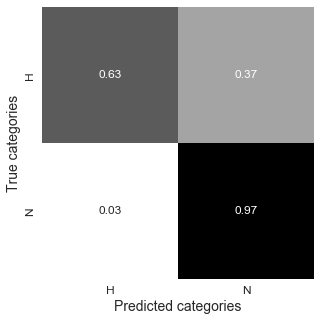

array([[ 24,  14],
       [  5, 140]])

In [50]:
print_cm(y_test, y_preds_lr , ['H','N'])

In [51]:
# Predictions with tfidf

y_preds_lr_tfidf = lr_model_tfidf.predict(X_test_tfidf)
print(classification_report( y_test_tfidf, y_preds_lr_tfidf ))

             precision    recall  f1-score   support

          0       0.65      0.74      0.69        38
          1       0.93      0.90      0.91       145

avg / total       0.87      0.86      0.87       183



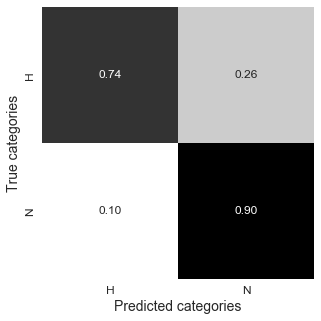

array([[ 28,  10],
       [ 15, 130]])

In [52]:
print_cm(y_test, y_preds_lr_tfidf , ['H','N'])

# Find  misclassified tweets

In [53]:
df_y = pd.DataFrame(y_test, columns=['actual'])

df_y['pred'] = y_preds_lr
err_df = df_y[df_y['pred']!=df_y['actual']]
indexes = err_df.index


df_wrong = pd.concat([tw_data.iloc[indexes,:],err_df], axis=1)


In [36]:
# Reminder: categories. The problem is when Predicted=1 and Actual=0
label_to_id_fr

{'H': 0, 'N': 1}

In [54]:
for index, row in df_wrong.iterrows():
    if row['pred']==1 and  row['actual']==0:
        print(row['Texte'])
        print('Predicted: %s , Actual: %s \n' %( 'N', 'H'))

Ça me dégoute putain ... Serieux on voit au moins 4/5 videos comme ça par semaines j'en peux plus c'est abusé..

Toujours des femmes blanches en plus ces chiennes de raciste la https://t.co/1hp2jl8BmQ
Predicted: N , Actual: H 

Qu'ils crevent. Rien à foutre de tes putain de refugies.
Predicted: N , Actual: H 

@RMCsport n'oubliez pas que Lyon n'est pas encore qualifié en ldc....en attente d'une décision de l'UEFA pour propos raciste proche nazi contre le cska Moscou...vous n'en parlez pas??
Predicted: N , Actual: H 

@PhildjackLamare @davidperrotin @Le_GrandR Oui c'est vrai que c'est terrible le racisme chez les blancs et gérants de grands restaurants
Faut vrmt se méfier de ces gens-là en effet 🙂
Predicted: N , Actual: H 

@Bob_lePlombier @Caroline76966 @Ex_Panthera @Yaannoou @dali89z @RebelHelene @HenriTudors @Patosoleil @_JeanDorsans_ @Maraine_Lapine @alexiscorbiere @FredTolosa31 Même réponse à tous les nazi de ton espèce https://t.co/PjezkIdWwE
Predicted: N , Actual: H 

@DiiaraGals

#  Visualise 2-dim PCA

In [56]:
from sklearn.decomposition import PCA, RandomizedPCA

n_components = 2
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape
y_train.shape

(1033, 2)

(1033,)

In [58]:
tw_data_pca = pd.DataFrame(data=np.append(X_train_pca, y_train.reshape(y_train.shape[0],1), axis=1), columns=['P1','P2','Label'])

tw_data_pca.head(5)

,P1,P2,Label
0,-2.286101,-0.294705,1.0
1,0.948136,0.238164,1.0
2,0.553251,-0.522335,1.0
3,-1.031042,-0.512555,1.0
4,-0.071920,1.433256,1.0


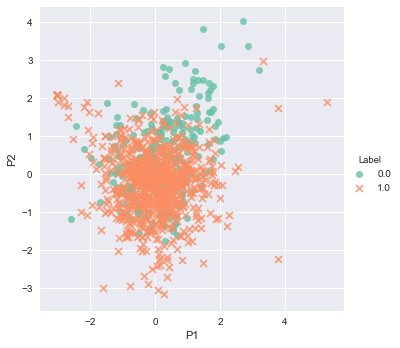

In [59]:

sns.lmplot(x="P1", y="P2", data=tw_data_pca, fit_reg=False, hue='Label', legend=True, markers=["o", "x"], palette="Set2")

